In [1]:
import os
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

dataset_path = "./train"

face_size = (64, 64)
faces = []
labels = []
detected_images_list = []

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

for person_name in os.listdir(dataset_path):
    person_folder = os.path.join(dataset_path, person_name)
    if not os.path.isdir(person_folder):
        continue

    for img_name in os.listdir(person_folder):
        img_path = os.path.join(person_folder, img_name)

        if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue 

        image = cv2.imread(img_path)
        if image is None:
            print(f"Skipping unreadable image: {img_path}")
            continue

        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray = cv2.equalizeHist(gray)

        detected_faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

        if len(detected_faces) == 0:
            print(f"No face detected in: {img_path}")
            continue

        for (x, y, w, h) in detected_faces:
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

            face_crop = gray[y:y+h, x:x+w]
            face_resized = cv2.resize(face_crop, face_size)
            faces.append(face_resized.flatten())
            labels.append(person_name)

        detected_images_list.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

faces = np.array(faces)
labels = np.array(labels)

print(f"Total faces detected and preprocessed: {len(faces)}")
print(f"Classes (persons): {set(labels)}")


No face detected in: ./train\jose\jose3.jpg
✅ Total faces detected and preprocessed: 14
🧠 Classes (persons): {np.str_('jose'), np.str_('sid')}


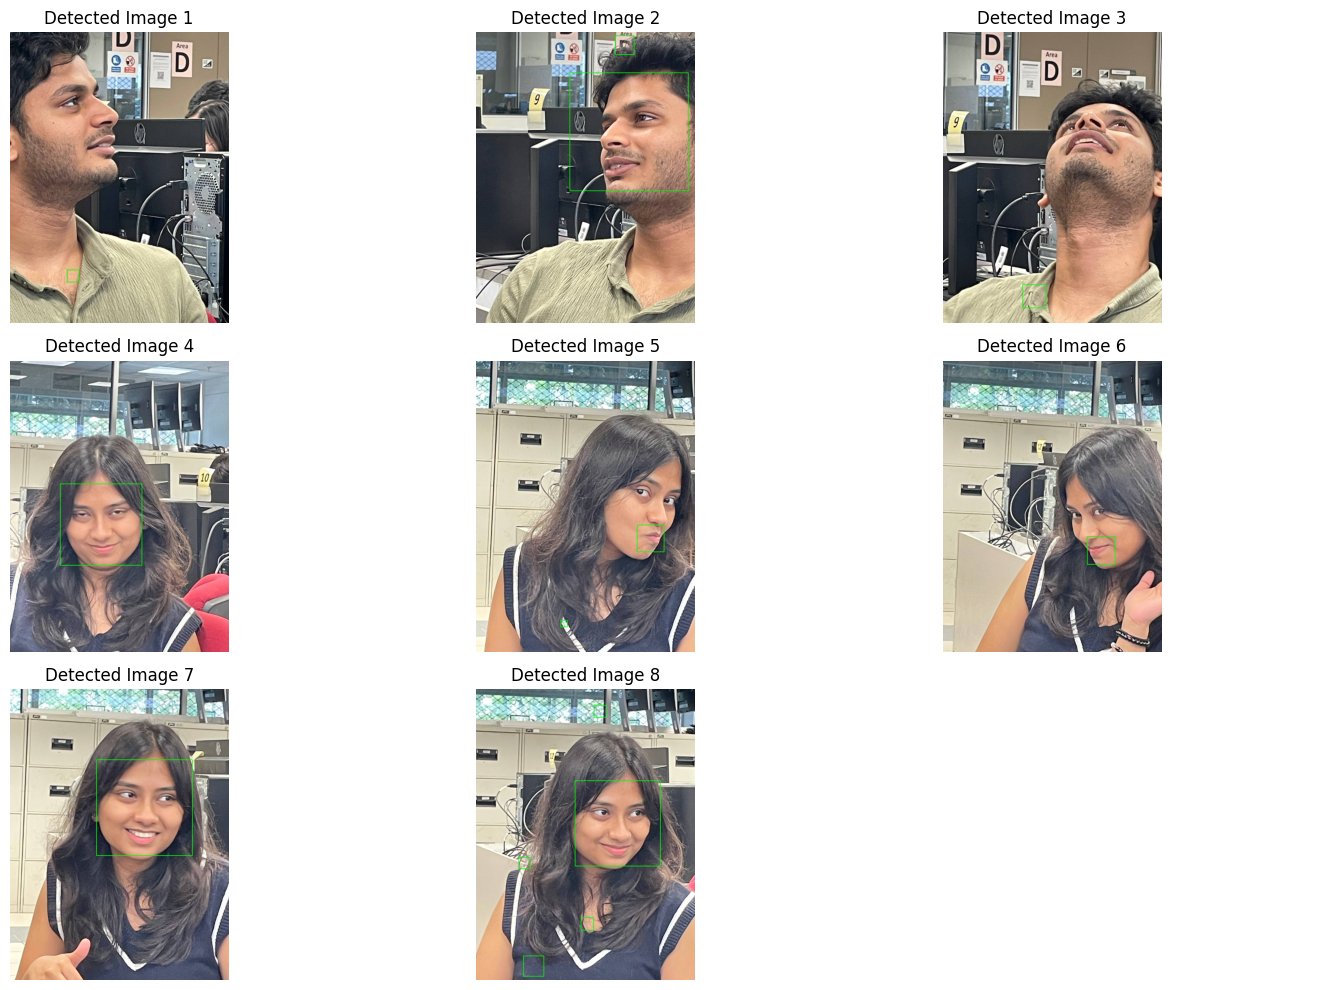

In [4]:
num_images_to_display = min(9, len(detected_images_list))
rows = 3
cols = (num_images_to_display + 2) // 3

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()

for i in range(num_images_to_display):
    axes[i].imshow(detected_images_list[i])
    axes[i].axis("off")
    axes[i].set_title(f"Detected Image {i+1}")

# Turn off any extra axes
for i in range(num_images_to_display, len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.show()
